## Spectral analysis for discrete signal

### 1. Fourier spectrum (frequency spectrum、spectrum)

-> It is a double-slided spectrum.

- Amplitude/Magnitude spectrum
- Phase spectrum

#### (1) Discrete Fourier transform (DFT)
$$ X[k]=\sum_{n=0}^{N-1}x[n]e^{-j2\pi kn/N}, k= 0, 1, ..., N-1 $$

- Amplitude/Magnitude: 

$$ \left |X[k] \right |, k= 0, 1, ..., N-1$$

- Argument/Phase angle: 

$$ Arg\left (X[k] \right ), k= 0, 1, ..., N-1$$

#### (2) DFT Calculation
- Matrix representation -> time complexity: $O(N^{2})$



- Fast Fourier transform (FFT) -> time complexity: $O(N\cdot log_{2}N)$

In [1]:
import numpy as np
from numpy.fft import fft, fftshift, fftfreq
import scipy.signal as signal
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

# number of samples
N = 1000
# sampling rate
fs = 1000

t = np.linspace(0, 1, fs, endpoint = False)

f = fftshift(fftfreq(N, 1/fs))

# harmonic wave
x1 = 10 + 10 * np.cos(2 * np.pi * 100 * t) + 2 * np.cos(2 * np.pi * 300 * t) + 6 * np.cos(2 * np.pi * 400 * t)
X1 = fftshift(fft(x1))
X1m = abs(X1)

# square wave
x2 = signal.square(2 * np.pi * 25 * t)
X2 = fftshift(fft(x2))
X2m = abs(X2)

# beat wave
x3 = np.cos(2 * np.pi * 15 * t) * np.cos(2 * np.pi * 100 * t)
X3 = fftshift(fft(x3))
X3m = abs(X3)

# chirp wave
x4 = signal.chirp(t, 0, 1, 300, "linear")
X4 = fftshift(fft(x4))
X4m = abs(X4)

def freq_spectrum(frequency, Xm, x_label, y_label, title_name):
    fig = plt.gcf()
    fig.set_size_inches(8, 4)
    plt.plot(frequency, Xm)
    plt.xlabel(x_label, fontsize = 15)
    plt.ylabel(y_label, fontsize = 15)
    plt.title(title_name, fontsize = 18)
    
    plt.show()

#### (3) Harmonic wave

Definition: 

$$ x(t)= A_{0} + \sum_{k=1}^{N}A_{k}\cdot cos(2\pi f_{k}t) $$

where $ f_{k}=k\cdot f_{1} $, k = 1, 2,..., N. f1 is called the fundamental frequency.

Fourier spectrum

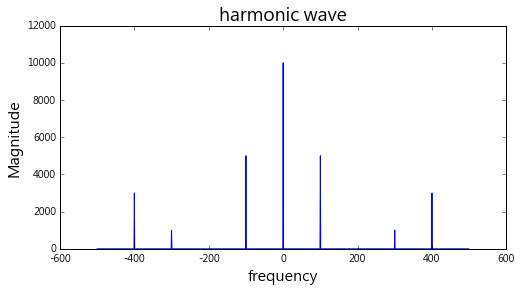

In [2]:
freq_spectrum(f, X1m, "frequency", "Magnitude", "harmonic wave")

#### (4) Square  wave

Definition: 

$$ x(t)=A\cdot sgn(sin(2\pi f t)) $$

Fourier spectrum

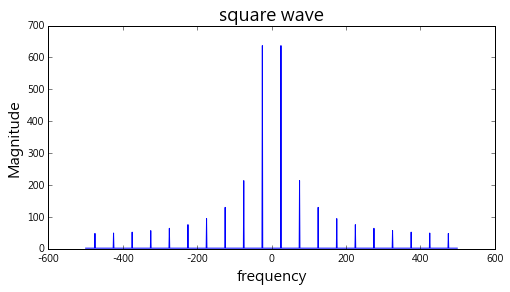

In [3]:
freq_spectrum(f, X2m, "frequency", "Magnitude", "square wave")

#### (5) Beat wave

Definition: 

$$ x(t)=A\cdot cos(2\pi f_{1}t) \cdot cos(2\pi f_{2}t) $$

[Note] If f1 < f2, then f2 is called carrier frequency.

Fourier spectrum

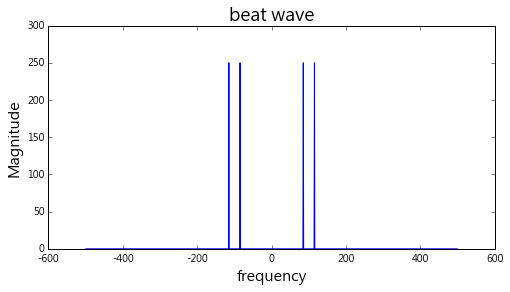

In [4]:
freq_spectrum(f, X3m, "frequency", "Magnitude", "beat wave")

#### (6) Chirp wave (Sweep signal)

Definition: 

    The frequency of a signal increases (up-chirp) or decreases (down-chirp) with time.

    [Note] signal.chirp(t, f0, t1, f1, method = "linear", phi = 0, vertex_zero = True)

       t: time array
       f0: frequency at t = 0
       t1: time point t = t1
       f1: frequency at t = t1

Fourier spectrum

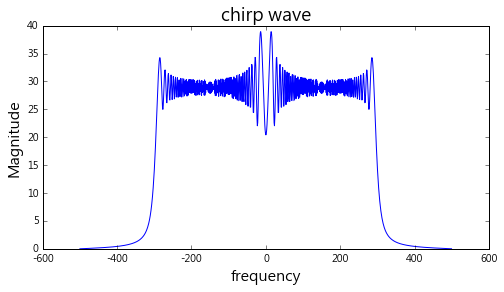

In [5]:
freq_spectrum(f, X4m, "frequency", "Magnitude", "chirp wave")

### 2. Example: Sunspots  Cycle

#### (1) Import data

In [21]:
import numpy as np
import pandas as pd
from numpy.fft import fft, fftshift, fftfreq
import scipy.signal as signal
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

sunspots = pd.read_excel("sunspots_data.xlsx")

year = np.array(sunspots["年份 (西元)"])

num = np.array(sunspots["黑子數量"])

#df = sunspots.round(2)
sunspots.describe()[["黑子數量"]]

,黑子數量
count,312.000000
mean,49.514103
std,40.389348
min,0.000000
25%,15.900000
50%,40.000000
75%,69.500000
max,190.200000


#### (2) Time variation of Sunspots

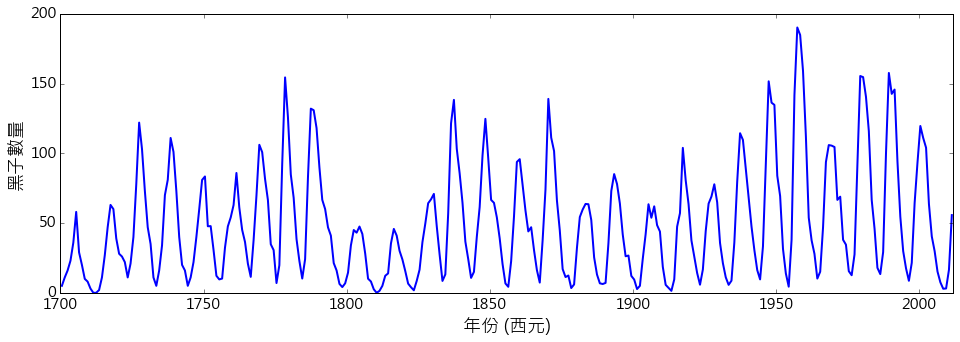

In [7]:
# Plotting with pandas
'''
sunspots.plot(kind='line', x='年份 (西元)', y='黑子數量')
plt.show()
'''

fig, axes = plt.subplots(figsize=(16, 5))
axes.plot(year, num, lw = 2, color = "blue")
axes.set_xlabel("年份 (西元)", fontsize = 18)
axes.set_ylabel("黑子數量", fontsize = 18)
axes.tick_params(axis = 'both', labelsize = 15)
axes.set_xlim(1700, 2012)
plt.show()

#### (3)  Sunspots frequency spectrum

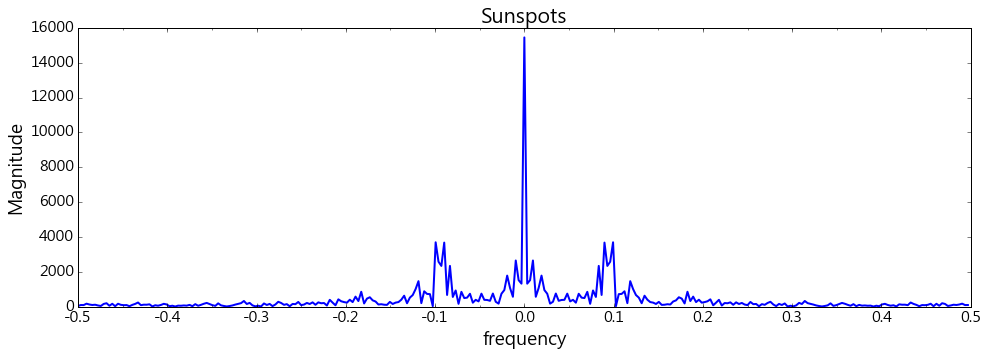

In [8]:
N = 312  # number of samples
fs = 1   # (1/year)

f = fftshift(fftfreq(N, 1/fs))

Num = fftshift(fft(num))
Num_m = abs(Num)
    
fig, axes = plt.subplots(figsize=(16, 5))
axes.plot(f, Num_m, lw = 2, color = "blue")
axes.set_xlabel("frequency", fontsize = 18)
axes.set_ylabel("Magnitude", fontsize = 18)
axes.set_title("Sunspots", fontsize = 20)
axes.tick_params(axis = 'both', labelsize = 15)
axes.set_xlim(-0.5, 0.5)
axes.xaxis.set_major_locator(mpl.ticker.MaxNLocator(10))
axes.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(20))
plt.show()

### 3. Energy and Parseval's theorem
#### (1)  Energy
**For a finite signal:**
- Continuous case:

$$ E=\int_{-\infty }^{\infty }\left | x(t) \right |^{2} dt $$

- Discrete case:

$$ E=\sum_{n=-\infty}^{\infty}x^{2}[n] $$

#### (2) Parseval's theorem
If the Fourier transform of a signal x(t) is

$$ X(f)=\int_{-\infty }^{\infty } x(t)e^{-j (2\pi f t)} dt ,$$

then 

$$ E=\int_{-\infty }^{\infty }\left | x(t) \right |^{2}dt=\int_{-\infty }^{\infty }\left | X(f) \right |^{2}df .$$

### 4. Energy Spectral Density (ESD)
#### Definition:
If the Fourier transform of a signal x(t) is X(f), then Energy Spectral Density (ESD) is

$$ S_{xx}(f)=\left | X(f) \right |^{2} $$

- ESD is the Fourier transform of signal's autocorrelation.



- It is applied for the energy of a signal focused in a time interval. (eg. impulse signal)

### 5. Power Spectral Density (PSD)
#### (1) Two common techniques for power spectral density (PSD) estimation: (non-parametric methods)

-> It is used for continuous or stationary process signal.

- Periodogram

      - The modulus-squared of the discrete Fourier transform

- Welch's method (method of averaged Periodograms)
      
      - It is based on Periodogram and Bartlett's method
      
- Comparison: 

      a. They are both single-slided spectrums.
      
      b. Welch's method has lower resolution but higher noise immunity than Periodogram.

In [17]:
import numpy as np
import numpy.random as random
import scipy.signal as signal
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

# sampling rate
fs = 1000
t = np.linspace(0, 1, fs, endpoint = False)
x = 10 * np.cos(2 * np.pi * 100 * t) + 4 * np.cos(2 * np.pi * 300 * t) + 6 * np.cos(2 * np.pi * 400 * t)

noise = random.uniform(-1, 1, fs)

nf1, npsd_1 = signal.periodogram(noise, fs)
nf2, npsd_2 = signal.welch(noise, fs)

y = x + noise

f1, psd_1 = signal.periodogram(y, fs)
f2, psd_2 = signal.welch(y, fs)

def PSD_fig(freq1, psd1, freq2, psd2, x_label, y_label, title_1, title_2):
    # sharey = True
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    axes[0].plot(freq1, psd1)
    axes[1].plot(freq2, psd2)
    
    axes[0].set_xlabel(x_label, fontsize = 18)
    axes[0].set_ylabel(y_label, fontsize = 18)
    axes[1].set_xlabel(x_label, fontsize = 18)
    axes[1].set_ylabel(y_label, fontsize = 18)
    
    axes[0].set_title(title_1, fontsize = 20)
    axes[1].set_title(title_2, fontsize = 20)
    
    axes[0].tick_params(axis = 'both', labelsize = 15)
    axes[1].tick_params(axis = 'both', labelsize = 15)

    axes[0].axis('tight')
    axes[1].axis('tight')

    axes[0].set_ylim(-15, 5)
    
    fig.tight_layout()
    plt.show()

#### (2) Noise plot

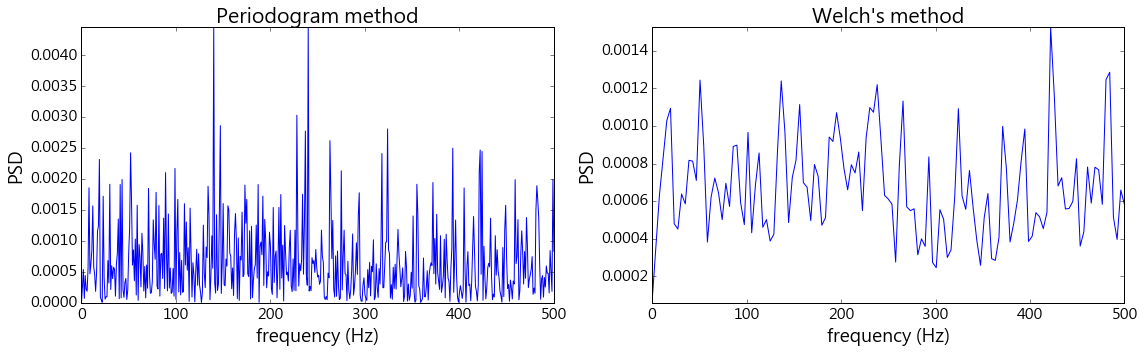

In [10]:
PSD_fig(nf1, npsd_1, nf2, npsd_2, "frequency (Hz)", "PSD", "Periodogram method", "Welch's method")

#### (3) PSD plot

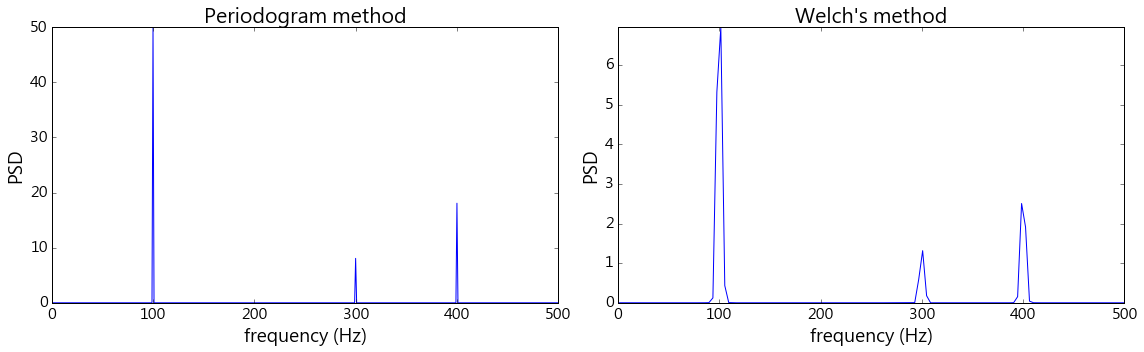

In [11]:
PSD_fig(f1, psd_1, f2, psd_2, "frequency (Hz)", "PSD", "Periodogram method", "Welch's method")

#### (4) log(PSD) plot

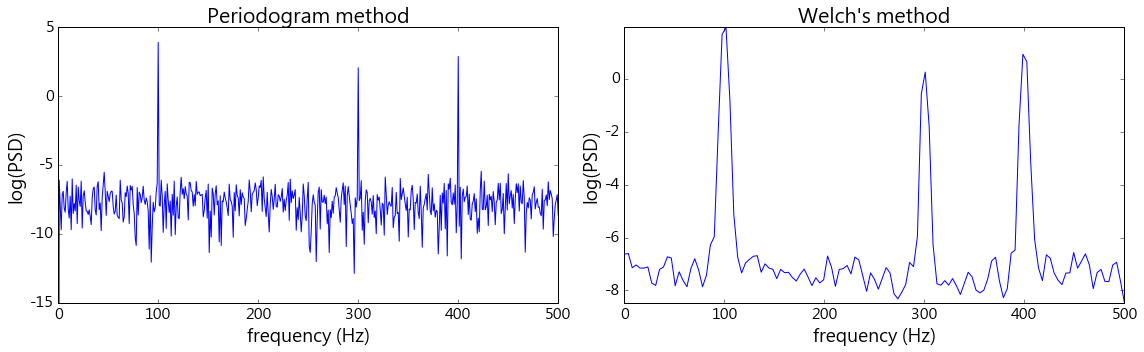

In [18]:
log_psd_1 = np.log(psd_1)
log_psd_2 = np.log(psd_2)

PSD_fig(f1, log_psd_1, f2, log_psd_2, "frequency (Hz)", "log(PSD)", "Periodogram method", "Welch's method")

#### Reference: [Spectral density estimation](https://en.wikipedia.org/wiki/Spectral_density_estimation)